# Analyse Crime in Boston

### Context:
##### Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
os.listdir('data')

['.dropbox',
 '.ipynb_checkpoints',
 '311-service-requests.csv',
 'bikes.csv',
 'crime.csv',
 'cwurData.csv',
 'educational_attainment_supplementary_data.csv',
 'education_expenditure_supplementary_data.csv',
 'kaggle.json',
 'media_mnp.ipynb',
 'offense_codes.csv',
 'pandas_extras.ipynb',
 'pandas_intro.ipynb',
 'plotter.ipynb',
 'Pokemon.csv',
 'school_and_country_table.csv',
 'shanghaiData.csv',
 'StudentsPerformance.csv',
 'timesData.csv',
 'weather_2012.csv']

In [3]:
data = pd.read_csv('data/crime.csv',encoding='latin1')

In [4]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [38]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [39]:
data.max()

INCIDENT_NUMBER                              I182070945
OFFENSE_CODE                                       3831
OFFENSE_CODE_GROUP                      Warrant Arrests
OFFENSE_DESCRIPTION    WEAPON - OTHER - OTHER VIOLATION
REPORTING_AREA                                       99
OCCURRED_ON_DATE                    2018-09-03 21:25:00
YEAR                                               2018
MONTH                                                12
DAY_OF_WEEK                                   Wednesday
HOUR                                                 23
Lat                                              42.395
Long                                                 -1
Location                    (42.39504158, -71.01017732)
dtype: object

In [40]:
data.min()

INCIDENT_NUMBER                                           142052550
OFFENSE_CODE                                                    111
OFFENSE_CODE_GROUP                               Aggravated Assault
OFFENSE_DESCRIPTION    A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.
REPORTING_AREA                                                     
OCCURRED_ON_DATE                                2015-06-15 00:00:00
YEAR                                                           2015
MONTH                                                             1
DAY_OF_WEEK                                                  Friday
HOUR                                                              0
Lat                                                              -1
Long                                                       -71.1787
Location                                 (-1.00000000, -1.00000000)
dtype: object

In [41]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


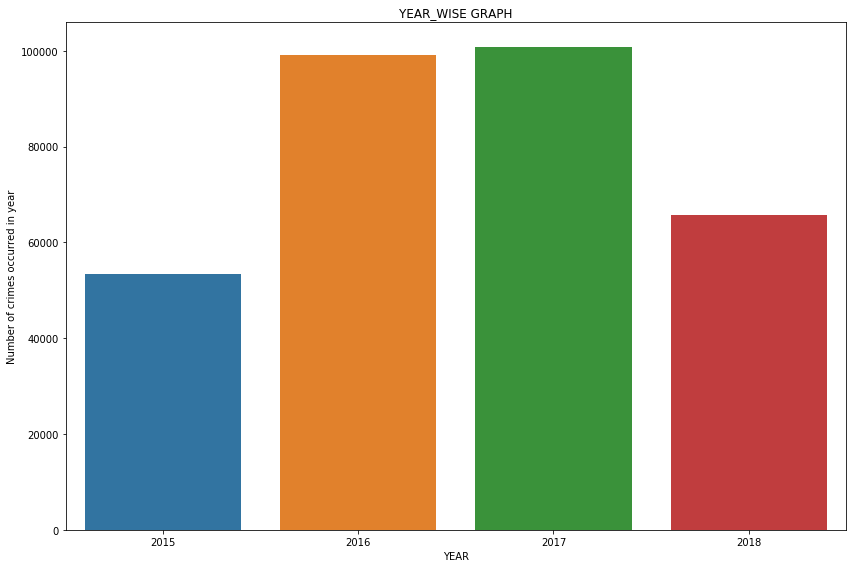

In [5]:
# Year_Wise Graph

fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
p=sns.countplot(x='YEAR',data=data)
plt.ylabel("Number of crimes occurred in year")
plt.title("YEAR_WISE GRAPH")
plt.tight_layout()
plt.show()

# Summary 
#### -> Above Count Graph represents 'number of crimes occurred in a year at Boston' .
#### -> Maximum Crime Occured in year 2017.
#### -> Minimum Crime Occured in year 2015.
#### -> In this graph ,we observed that crimes are increasing year by year while In year 2018 , crimes are reduced as compared to previous years.

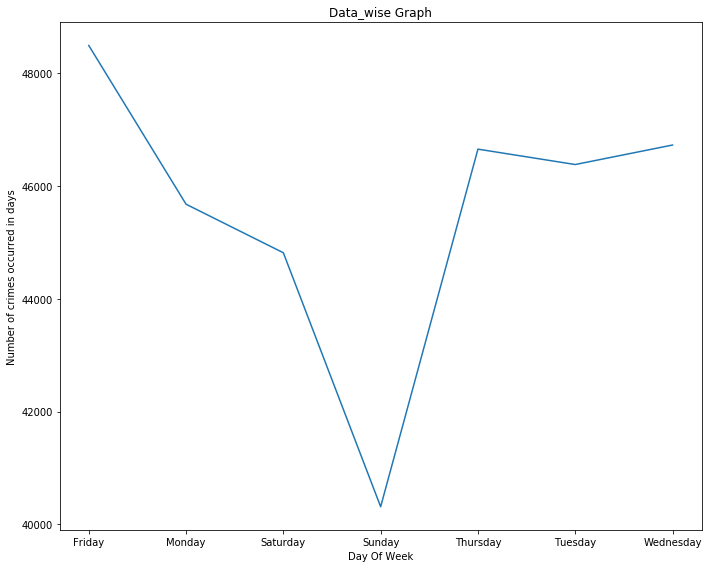

In [6]:
# Date_wise Graph

df=data.groupby(["DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111)
p=sns.lineplot(x=df.iloc[:,0],y=df.iloc[:,1],data=df)
plt.xlabel("Day Of Week")
plt.ylabel("Number of crimes occurred in days")
plt.title("Data_wise Graph")
plt.tight_layout()
plt.show()

# Summary 
#### * Above Line Graph represents 'number of crimes occurred in a day during a week, at Boston'.
#### * This graph tells us about crimes occurred during a week ,but it varies day by day, Maximum Crimes occurred on Friday and Minimum Crimes occurred on Sunday.

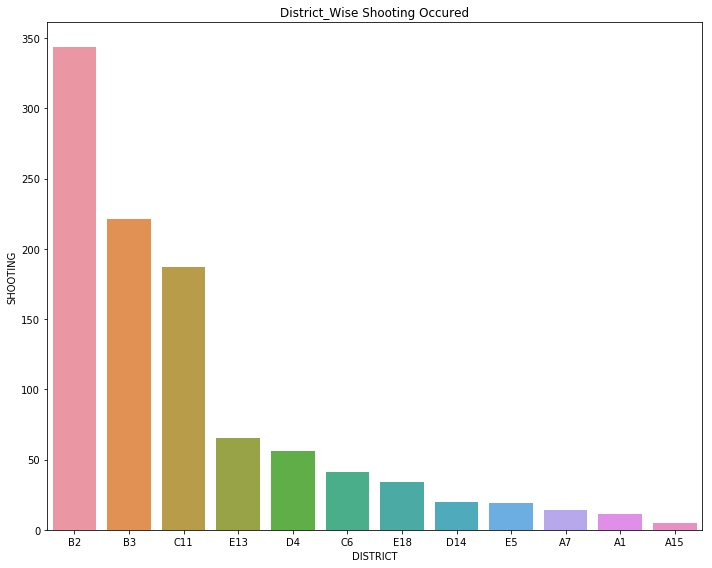

In [8]:
#District-wise shooting occured

shootingOccured= data[data["SHOOTING"]=="Y"].groupby("DISTRICT").agg("SHOOTING").count().reset_index().sort_values("SHOOTING",ascending=False)
shootingOccured
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111)
p=sns.barplot(x=shootingOccured.DISTRICT,y=shootingOccured.SHOOTING,data=df)
plt.title("District_Wise Shooting Occured")
plt.tight_layout()
plt.show()

# Summary 
#### * Above Bar Graph represents 'number of crimes occurred at Shooting in Boston'.
#### * In this graph tell us that crimes occurred during shooting in desending order , While Maximum Crimes Occured on B2 and Minimum Crimes occurred on A15. 

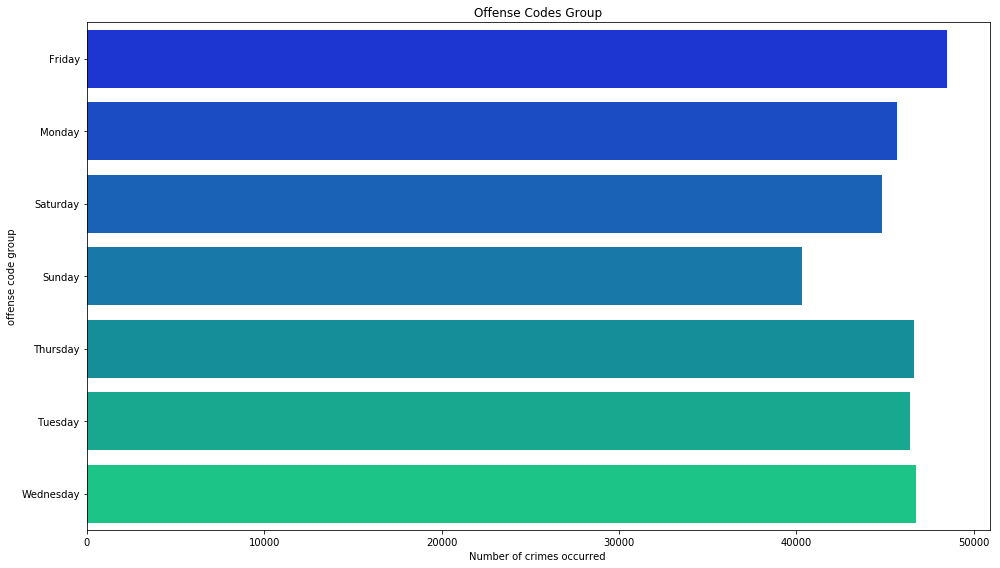

In [9]:
# Based on offense codes Group

d=data["OFFENSE_CODE_GROUP"].value_counts().reset_index()
fig= plt.figure(figsize=(14,8))
ax= fig.add_subplot(111)
p=sns.barplot(x=df.iloc[:,1],y=df.iloc[:,0],data=d,palette="winter")
plt.ylabel("offense code group")
plt.xlabel("Number of crimes occurred ")
plt.title("Offense Codes Group")
plt.tight_layout()
plt.show()

# Summary 
#### * Above Horizontal bar Graph tells us  'number of crimes occurred during a week are based offense code group'.
#### * this graph tells us that, Maximum Crimes Occured on Friday while Minimum Crimes Occured on Sunday.

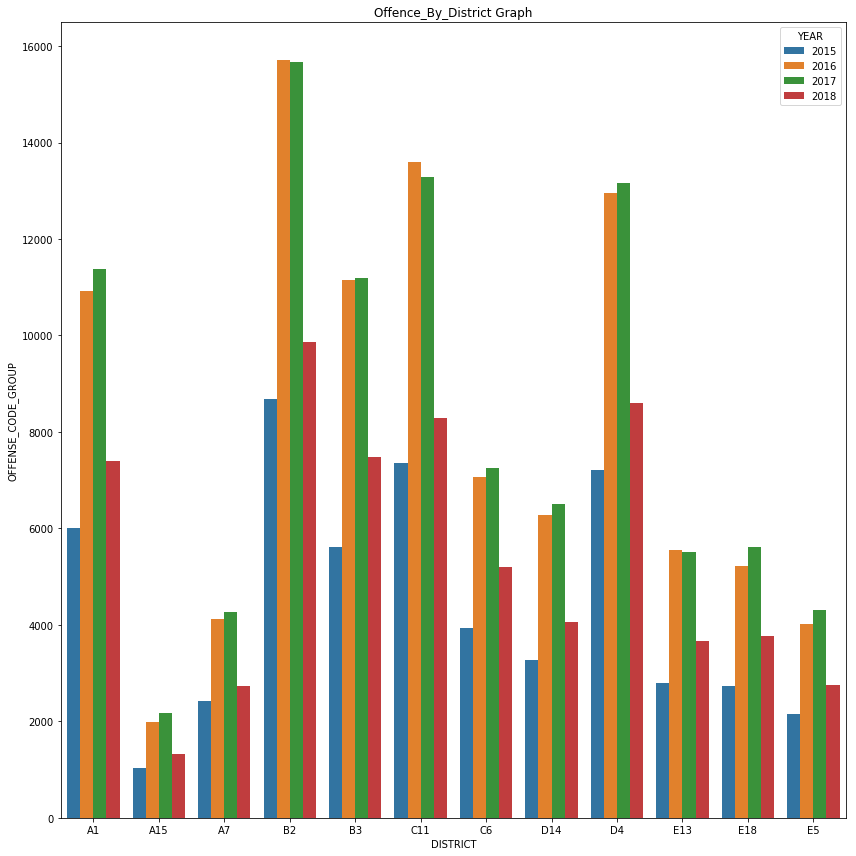

In [20]:
# Based on Number of offense by district and year

df1 =data.groupby(["YEAR","DISTRICT"])["OFFENSE_CODE_GROUP"].count().reset_index()
fig= plt.figure(figsize=(12,12))
ax= fig.add_subplot(111)
p=sns.barplot(x="DISTRICT",y="OFFENSE_CODE_GROUP",hue='YEAR',data=df1,ax=ax)
plt.title("Offence_By_District Graph")
plt.tight_layout()
plt.show()

# Summary 
#### * Above bar Graph represents 'number of crimes based on offense code group  in district at Boston'.
#### * we conclude that, this graph tell us that, Maximum crimes occurred at B2 in year 2016 while Minimum crimes occurred  at A15 in 2015.

C:\Users\SHRADDHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


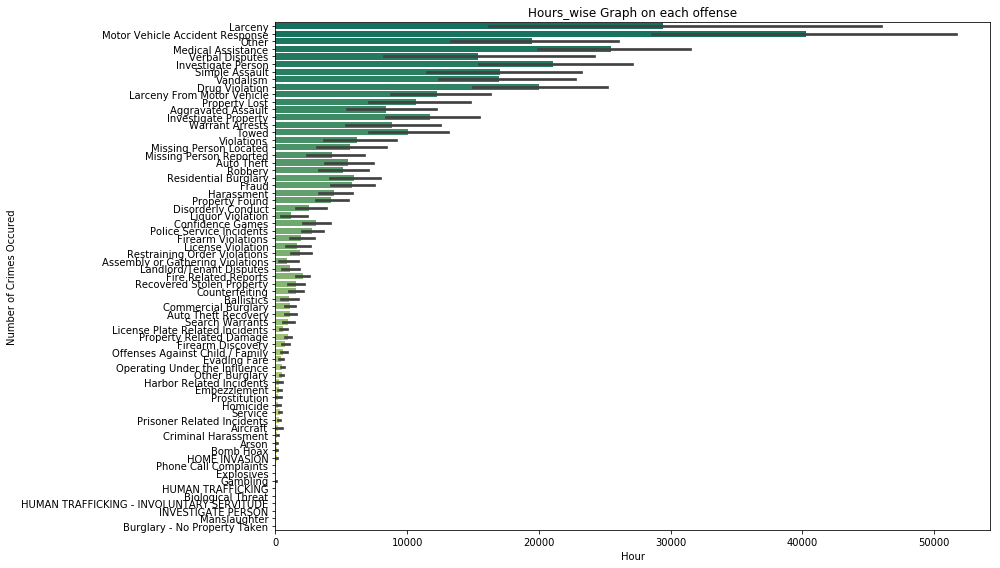

In [23]:
# Based on Number of hours spent on each offense by district and year

df2 =data.groupby(["DISTRICT","OFFENSE_CODE_GROUP"])["HOUR"].sum().reset_index().sort_values("HOUR",ascending=False)
df2
fig= plt.figure(figsize=(14,8))
ax= fig.add_subplot(111)
p=sns.barplot(x="HOUR",y="OFFENSE_CODE_GROUP",data=df2,palette="summer")
plt.ylabel("Number of Crimes Occured")
plt.xlabel("Hour")
plt.title("Hours_wise Graph on each offense")
plt.tight_layout()
plt.show()

# Summary
##### * Above bar Graph represents 'number of crimes based  on Number of hours spent on each offense by district and year'.
##### * I conclude that in this graph ,Maximum crime occurred at "Larceny" while Minimum crimes at "Burglary".

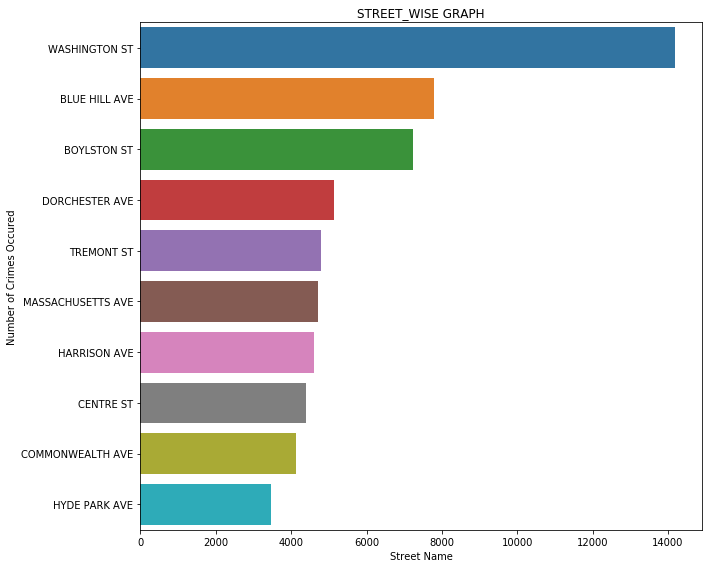

In [18]:
# Top 10 most crime occurred street

df2 =data["STREET"].value_counts().head(10).reset_index()
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111)
p=sns.barplot(x=df2.iloc[:,1],y=df2.iloc[:,0],data=df2)#,palette="spring")
plt.ylabel("Number of Crimes Occured")
plt.xlabel("Street Name")
plt.title("STREET_WISE GRAPH")
plt.tight_layout()
plt.show()

# Summary
#### * Above horizontal bar Graph represents 'Top 10 most occured crimes in boston'.  
#### * in this graph, Maximum crtimes occured at 'WASHINGTON_ST' street while Minimum crime at "HYDE PARK EVE".

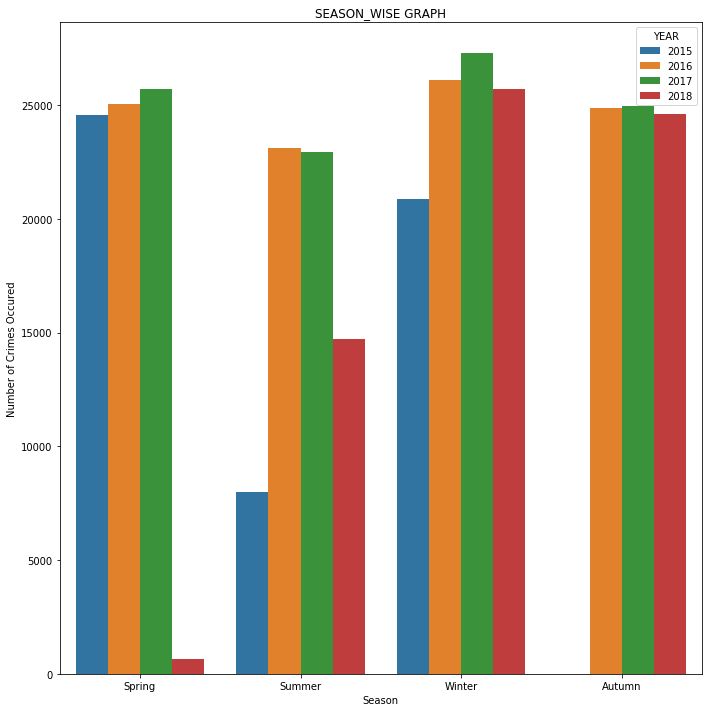

In [17]:
def get_SeasonName(x):
    y=(x%12+3)//3
    if(y==4):
        return "Spring"
    elif(y==3):
        return "Winter"
    elif(y==2):
        return "Autumn"
    else:
        return "Summer"

data['SEASON']=data["MONTH"].apply(lambda x: get_SeasonName(x))
# Number of crimes occurred in this season

df =data.groupby(["YEAR","SEASON"])["OFFENSE_CODE"].count().reset_index()
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(111)
p=sns.barplot(x="SEASON",y="OFFENSE_CODE",hue="YEAR",data=df)
plt.xlabel("Season")
plt.ylabel("Number of Crimes Occured")
plt.title("SEASON_WISE GRAPH")
plt.tight_layout()
plt.show()

# Summary
#### * Above Graph Represent "number of crimes occured in Different Seasons"
#### * This Graph tell us that, Maximum crime occurred in 2017 during winters while Minimum crime occured in 2018 during Spring. 

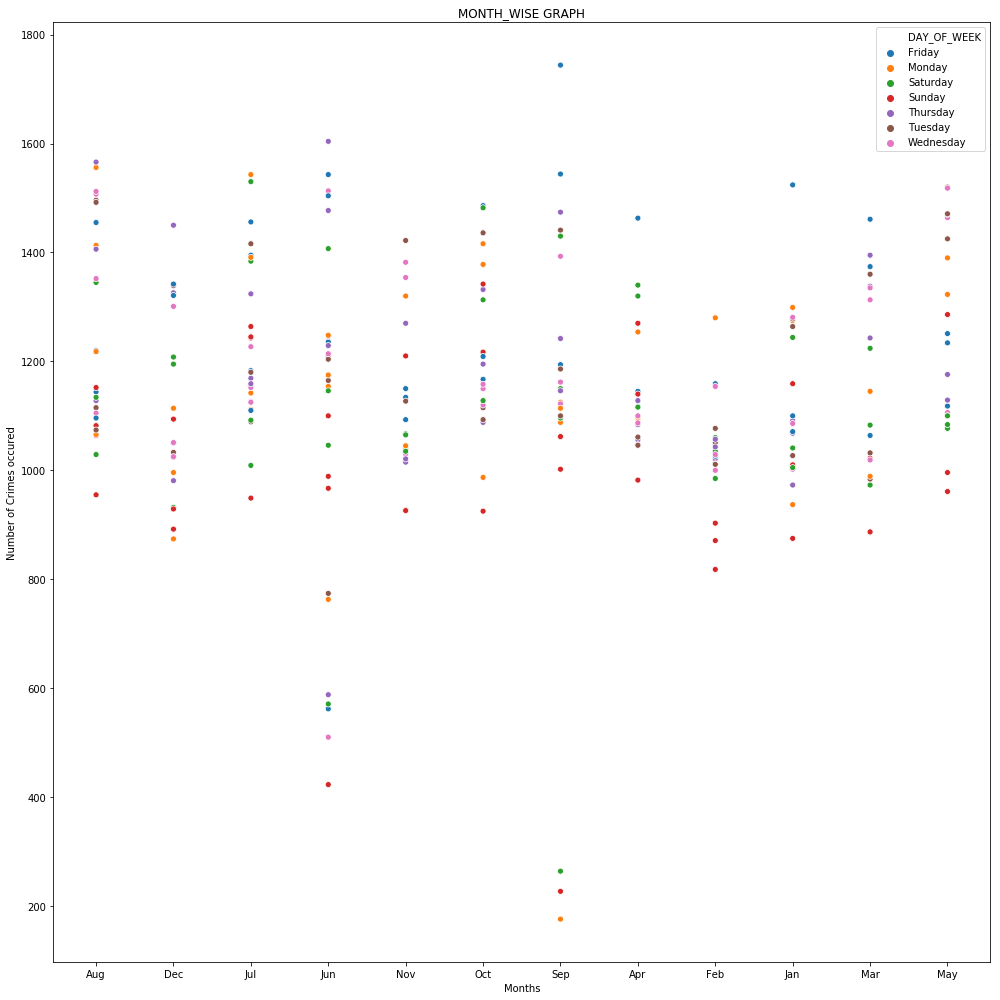

In [16]:
import calendar 
data["MONTH_NAME"]=data["MONTH"].apply(lambda x :calendar.month_abbr[x])
df=data.groupby(["YEAR","MONTH_NAME","DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
df
fig= plt.figure(figsize=(14,14))
ax= fig.add_subplot(111)
p=sns.scatterplot(x="MONTH_NAME",y="OFFENSE_CODE",hue="DAY_OF_WEEK",data=df)
plt.xlabel("Months")
plt.ylabel("Number of Crimes occured")
plt.title("MONTH_WISE GRAPH")
plt.tight_layout()
plt.show()

# Summary
#### Above Scatter Graph Represent "number of crimes occured in Different Month using offense code " .
#### In this graph tell us that, maximum crime occurred during september while minimum crime occurred during december.

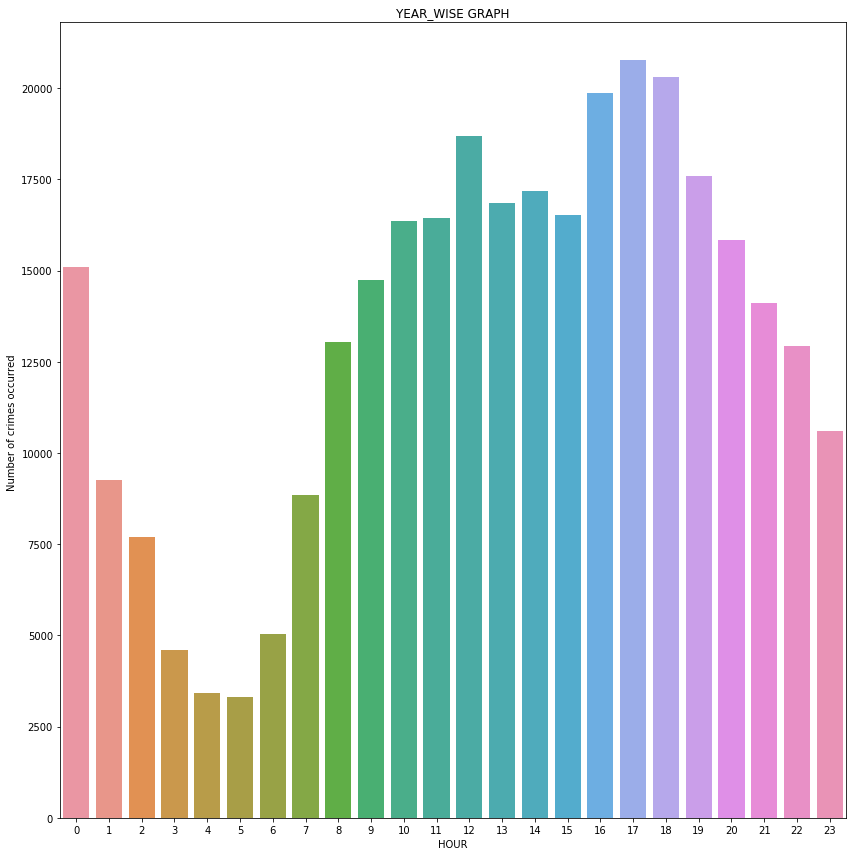

In [15]:
# Year_Wise Graph

fig= plt.figure(figsize=(12,12))
ax= fig.add_subplot(111)
p=sns.countplot(x='HOUR',data=data)
plt.ylabel("Number of crimes occurred ")
plt.title('YEAR_WISE GRAPH')
plt.tight_layout()
plt.show()

# Summary
#### -> Above Graph Represent "number of crimes occured at Different hours"
#### -> In this graph, Maximum crime occurred at 17 hour and Mminimum crime occurred at 5 hour.
#### -> Graph varies hour by hour, while number of crimes are distinctly increasing or decreasing, throughout a day.